In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df = df.drop(columns=['Outcome'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [62]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [63]:
X = df.drop(columns=['BMI']).values
y = df['BMI'].values

In [64]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [65]:
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1557)
print("학습 데이터 개수:", len(X_train))
print("테스트 데이터 개수:", len(X_test))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

학습 데이터 개수: 614
테스트 데이터 개수: 154
(614, 7) (154, 7)
(614, 248) (154, 248)


In [67]:
model = Sequential()

model.add(Dense(10, input_shape = (7, ), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(RMSprop(learning_rate=0.04), loss='mean_squared_error', metrics=['mse'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                80        
                                                                 
 dense_25 (Dense)            (None, 8)                 88        
                                                                 
 dense_26 (Dense)            (None, 6)                 54        
                                                                 
 dense_27 (Dense)            (None, 1)                 7         
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.1)

Epoch 1/30
18/18 [==============================] - 1s 12ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 8/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0

5/5 [==============================] - 0s 1ms/step


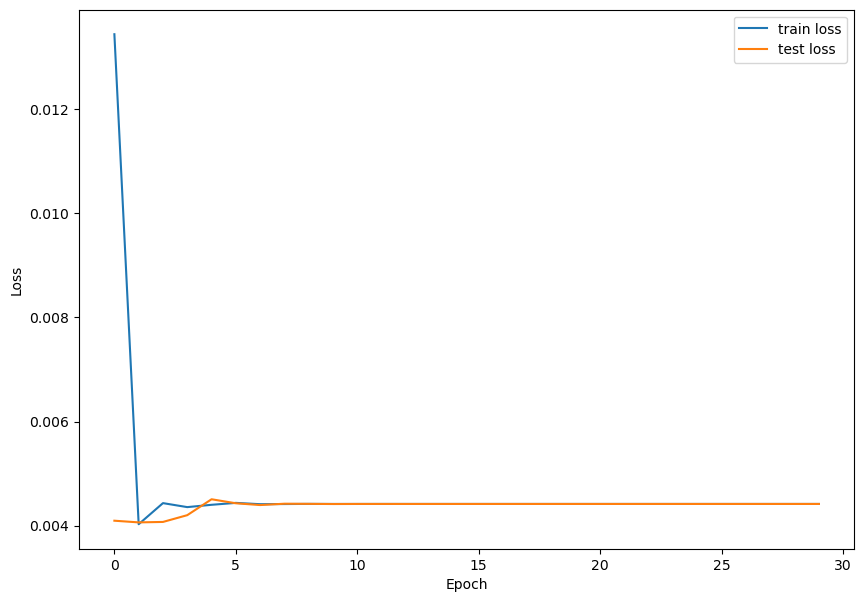

In [69]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,7))
plt.plot(range(30), model_history.history['loss'], label='train loss')
plt.plot(range(30), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044


[0.004416835960000753, 0.004416835960000753]